<a href="https://colab.research.google.com/github/jaafar19/NLP/blob/main/Markov_Models_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import string
from sklearn.model_selection import train_test_split

import gdown
file_id = "1qPMoLXomGiMpuxGAGqKj-oufYAPJNAjf"
gdown.download(f"https://drive.google.com/uc?id={file_id}", quiet=False)


file_id = "1wFYjE2TrMFO33do-7WCA2gH5Q7UA2NEI"
gdown.download(f"https://drive.google.com/uc?id={file_id}", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1qPMoLXomGiMpuxGAGqKj-oufYAPJNAjf
To: /content/edgar_allan_poe.txt
100%|██████████| 27.4k/27.4k [00:00<00:00, 22.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wFYjE2TrMFO33do-7WCA2gH5Q7UA2NEI
To: /content/robert_frost.txt
100%|██████████| 57.9k/57.9k [00:00<00:00, 3.73MB/s]


'robert_frost.txt'

In [62]:
!head edgar_allan_poe.txt

LO! Death hath rear'd himself a throne
In a strange city, all alone,
Far down within the dim west
Where the good, and the bad, and the worst, and the best,
Have gone to their eternal rest.
 
There shrines, and palaces, and towers
Are not like any thing of ours
Oh no! O no! ours never loom
To heaven with that ungodly gloom!


In [63]:
!head robert_frost.txt

Two roads diverged in a yellow wood,
And sorry I could not travel both
And be one traveler, long I stood
And looked down one as far as I could
To where it bent in the undergrowth; 

Then took the other, as just as fair,
And having perhaps the better claim
Because it was grassy and wanted wear,
Though as for that the passing there


In [65]:
input_files = ["robert_frost.txt", "edgar_allan_poe.txt"]


#collect data into lists
input_texts = []
labels=[] # Change variable name to labels

for label_index, f in enumerate (input_files):
  print(f"{f} corresponds to label {label_index}")
  for line in open(f):
    line = line.rstrip()
    if line:
      line = line.translate(str.maketrans("", "" ,string.punctuation))
      input_texts.append(line)
      labels.append(label_index) # Append to labels instead of label

robert_frost.txt corresponds to label 0
edgar_allan_poe.txt corresponds to label 1


In [66]:
input_texts

['Two roads diverged in a yellow wood',
 'And sorry I could not travel both',
 'And be one traveler long I stood',
 'And looked down one as far as I could',
 'To where it bent in the undergrowth',
 'Then took the other as just as fair',
 'And having perhaps the better claim',
 'Because it was grassy and wanted wear',
 'Though as for that the passing there',
 'Had worn them really about the same',
 'And both that morning equally lay',
 'In leaves no step had trodden black',
 'Oh I kept the first for another day',
 'Yet knowing how way leads on to way',
 'I doubted if I should ever come back',
 'I shall be telling this with a sigh',
 'Somewhere ages and ages hence',
 'Two roads diverged in a wood and I',
 'I took the one less traveled by',
 'And that has made all the difference',
 'Whose woods these are I think I know',
 'His house is in the village though',
 'He will not see me stopping here',
 'To watch his woods fill up with snow',
 'My little horse must think it queer',
 'To stop wit

In [67]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [68]:
train_text, test_text, train_labels, test_labels = train_test_split(input_texts, labels, test_size=0.2)

In [69]:
len(train_labels), len(test_labels)

(1723, 431)

In [70]:
train_text[:5]

['Its sometimes dim',
 'We made a day of it out of the world',
 'Of detail burned dissolved and broken off',
 'The mossy banks and the meandering paths',
 'As the leaves that were withering and sere']

In [71]:
train_labels[:5]

[0, 0, 0, 1, 1]

In [72]:
idx=1
word2idx = {'unk':0}

In [73]:
for text in train_text:
  tokens = text.split()
  for token in tokens:
    if token not in word2idx:
      word2idx[token] = idx
      idx += 1

In [74]:
word2idx

{'unk': 0,
 'Its': 1,
 'sometimes': 2,
 'dim': 3,
 'We': 4,
 'made': 5,
 'a': 6,
 'day': 7,
 'of': 8,
 'it': 9,
 'out': 10,
 'the': 11,
 'world': 12,
 'Of': 13,
 'detail': 14,
 'burned': 15,
 'dissolved': 16,
 'and': 17,
 'broken': 18,
 'off': 19,
 'The': 20,
 'mossy': 21,
 'banks': 22,
 'meandering': 23,
 'paths': 24,
 'As': 25,
 'leaves': 26,
 'that': 27,
 'were': 28,
 'withering': 29,
 'sere': 30,
 'Thats': 31,
 'smart': 32,
 'pair': 33,
 'pumps': 34,
 'youre': 35,
 'beading': 36,
 'there': 37,
 'At': 38,
 'end': 39,
 'our': 40,
 'path': 41,
 'liquescent': 42,
 'T': 43,
 'awake': 44,
 'us': 45,
 'Tis': 46,
 'symbol': 47,
 'token': 48,
 'It': 49,
 'was': 50,
 'down': 51,
 'by': 52,
 'dank': 53,
 'tarn': 54,
 'Auber': 55,
 'uncommonly': 56,
 'deep': 57,
 'snow': 58,
 'has': 59,
 'him': 60,
 'think': 61,
 'And': 62,
 'these': 63,
 'weak': 64,
 'lines': 65,
 'are': 66,
 'written': 67,
 'both': 68,
 'morning': 69,
 'equally': 70,
 'lay': 71,
 'Now': 72,
 'slowly': 73,
 'closing': 74,
 'l

In [75]:
len(word2idx)

2925

In [76]:
train_text_int = []
test_text_int = []

for text in train_text:
  tokens = text.split()
  line_as_int = [word2idx[token] for token in tokens]
  train_text_int.append(line_as_int)

for text in test_text:
  tokens = text.split()
  line_as_int = [word2idx.get(token, 0) for token in tokens]
  test_text_int.append(line_as_int)

In [77]:
train_text_int[100:500]

[[432, 433, 263, 434, 435, 77, 436],
 [167, 264, 126, 268, 11, 437, 438, 77, 439],
 [4, 440, 441, 6, 442, 280, 443, 117, 103, 45],
 [444, 445, 264, 446, 440, 197, 60],
 [20, 447, 448, 8, 144, 449, 450],
 [13, 263, 9, 451, 264, 359],
 [49, 50, 6, 452, 453, 17, 160, 10],
 [454, 455, 9, 456],
 [457, 145, 458, 77, 11, 459, 460],
 [49, 461, 6, 462, 463, 464],
 [135, 465, 466, 130, 467, 468],
 [62, 469, 470, 471, 472, 473, 474],
 [20, 342, 475, 476, 11, 477],
 [478, 404, 479, 66, 480, 481],
 [254, 126, 482, 117, 203, 93, 483, 51],
 [62, 77, 9, 6, 484, 485, 486],
 [62, 487, 105, 52, 128, 17, 203, 488, 8, 128],
 [88, 6, 489, 490, 268, 491],
 [195, 492, 125, 117, 282, 493, 117, 93],
 [494, 11, 495],
 [325, 496, 321, 497, 155, 498],
 [499, 500, 80, 186, 116, 277, 501, 110, 502],
 [91, 503, 6, 504, 8, 128, 117, 505, 475],
 [20, 506, 173, 8, 268, 507, 508, 509, 510],
 [511, 512, 119, 513, 514, 19, 513, 246],
 [184, 165, 515, 516],
 [195, 385, 10, 85, 517, 518, 185, 195, 101],
 [13, 277, 420, 519, 

In [78]:
v = len(word2idx)

A0 = np.zeros((v, v))
pi0 = np.zeros(v)

A1 = np.zeros((v, v))
pi1 = np.zeros(v)


In [79]:
def compute_counts(text_as_int, A, pi):
  for tokens in text_as_int:
    last_idx = None
    for idx in tokens:
      if last_idx is None:
        pi[idx] += 1
      else:
        A[last_idx, idx] += 1
      last_idx = idx



compute_counts([t for t, y in zip(train_text_int, train_labels) if y == 0], A0, pi0)
compute_counts([t for t, y in zip(train_text_int, train_labels) if y == 1], A1, pi1)

In [80]:
A0 /= A0.sum(axis=1, keepdims=True)
pi0 /= pi0.sum()

A1 /= A1.sum(axis=1, keepdims=True)
pi1 /= pi1.sum()


<ipython-input-80-f93a9b0f6a7c>:1: RuntimeWarning: invalid value encountered in divide
  A0 /= A0.sum(axis=1, keepdims=True)
<ipython-input-80-f93a9b0f6a7c>:4: RuntimeWarning: invalid value encountered in divide
  A1 /= A1.sum(axis=1, keepdims=True)


In [81]:
logA0 = np.log(A0)
logpi0 = np.log(pi0)

logA1 = np.log(A1)
logpi1 = np.log(pi1)


<ipython-input-81-64e74e0f0c3e>:1: RuntimeWarning: divide by zero encountered in log
  logA0 = np.log(A0)
<ipython-input-81-64e74e0f0c3e>:2: RuntimeWarning: divide by zero encountered in log
  logpi0 = np.log(pi0)
<ipython-input-81-64e74e0f0c3e>:4: RuntimeWarning: divide by zero encountered in log
  logA1 = np.log(A1)
<ipython-input-81-64e74e0f0c3e>:5: RuntimeWarning: divide by zero encountered in log
  logpi1 = np.log(pi1)


In [82]:
count0 = sum(y == 0 for y in train_labels)
count1 = sum(y == 1 for y in train_labels)

total = len(train_labels)
p0 = count0 / total
p1 = count1 / total
logp0 = np.log(p0)
logp1 = np.log(p1)
p0, p1

(0.673244341265235, 0.3267556587347649)

In [83]:
class classifier():
  def __init__(self, logAs, logpis, logpriors):
    self.logAs = logAs
    self.logpis = logpis
    self.logpriors = logpriors
    self.k = len(logpriors)

  def compute_log_likelihood(self, input_, class_):
    logA = self.logAs[class_]
    logpi = self.logpis[class_]

    last_idx = None
    logprob = 0

    for idx in input_:
      if last_idx is None:
        logprob += logpi[idx]
      else:
        logprob += logA[last_idx, idx]
      last_idx = idx

    return logprob


  def predict(self, inputs):
    predictions = np.zeros(len(inputs))
    for i, input_ in enumerate(inputs):
      posteriors = [self.compute_log_likelihood(input_, c) + self.logpriors[c] for c in range(self.k)]
      pred = np.argmax(posteriors)
      predictions[i]=pred
    return predictions

In [84]:
clf = classifier([logA0, logA1], [logpi0, logpi1], [logp0, logp1])

In [85]:
ptrain = clf.predict(train_text_int)
print (f"Train accuracy: {np.mean(ptrain == train_labels)}")

Train accuracy: 0.09170052234474753


In [86]:
ptest = clf.predict(test_text_int)
print (f"Test accuracy: {np.mean(ptest == test_labels)}")

Test accuracy: 0.4593967517401392


In [87]:
from sklearn.metrics import confusion_matrix, f1_score #
cm = confusion_matrix(test_labels, ptest)
cm

array([[193,  83],
       [150,   5]])

In [88]:
f1_score(train_labels, ptrain) # Call f1_score

0.0611877624475105

In [89]:
f1_score(test_labels, ptest)

0.0411522633744856

In [90]:
cm = confusion_matrix(train_labels, ptrain)
cm

array([[ 107, 1053],
       [ 512,   51]])

In [91]:
import numpy as np
from collections import Counter

# Assume y_train is your NumPy array of labels
unique, counts = np.unique(train_labels, return_counts=True)
print(dict(zip(unique, counts)))  # Show class distribution

{np.int64(0): np.int64(1160), np.int64(1): np.int64(563)}


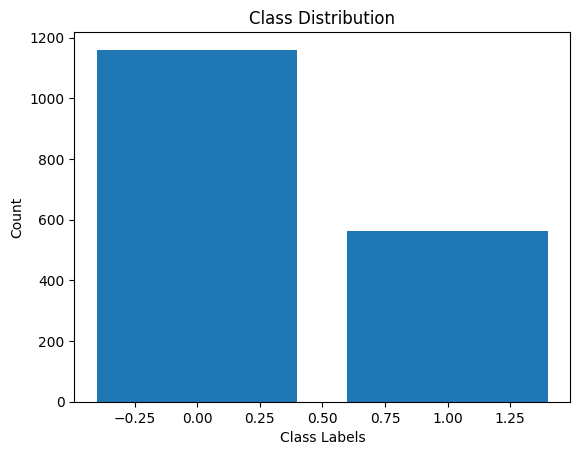

In [92]:
import matplotlib.pyplot as plt

plt.bar(unique, counts)
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()